In [1]:
import scipy.stats as sts
import scipy.special as scp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open('IB_statistics_data_hw5.txt', 'r')
line_1 = f.readline()
list_ex = line_1.split(' ')
list_ex

['Ex3a',
 'Ex3b',
 'Ex3c',
 'Ex3d',
 'Ex4a',
 'Ex4b',
 'Ex4c',
 'Ex5',
 'Ex6',
 'Ex7',
 'Ex8',
 'Ex9\n']

In [3]:
data = [[] for x in range(len(list_ex))]
data

[[], [], [], [], [], [], [], [], [], [], [], []]

In [4]:
for line in f:
    res = line.split(' ')
    for i in range(len(res)):
        data[i].append(res[i])

In [5]:
for i in range(len(data)):
    for j in range(len(data[0])):
        data[i][j] = float(data[i][j])

In [6]:
#Ex_3a
arr_1 = data[0]
arr_1 = np.array(arr_1)

x_mean = arr_1.mean()
n = len(arr_1)
p = 0.8

print(x_mean, n)

In [8]:
g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n/(p*(1-p)))*(p - x_mean)
print(g_1, g_2, s)

-1.9599639845400545 1.959963984540054 3.4521089314745503


In [59]:
#Ex_3b
arr_2 = data[1]
arr_2 = np.array(arr_2)

In [60]:
max(arr_2)

38.0

In [61]:
x_mean = arr_2.mean()
n = len(arr_2)
n_1 = 37
p = 0.6

print(x_mean, n)

22.065420560747665 214


In [11]:
g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n/n_1*(p*(1-p)))*(n_1*p - x_mean)
print(g_1, g_2, s)

-1.9599639845400545 1.959963984540054 0.15855880349319149


In [62]:
#Ex_3с
arr_3 = data[2]
arr_3 = np.array(arr_3)

In [63]:
x_mean = arr_3.mean()
n = len(arr_3)
p = 0.7

print(x_mean, n)

1.0560747663551402 214


In [64]:
g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n*(p**2)/(1-p))*((1-p)/p - x_mean)
s_1 = np.sqrt(n*(p**2)/(1-p))*(1/p - x_mean)
print(g_1, g_2, s, s_1)

-1.9599639845400545 1.959963984540054 -11.731683543033967 6.964127039375484


In [15]:
#Ex_3d
arr_4 = data[3]
arr_4 = np.array(arr_4)
arr_4[0:20]

array([ 1.28035355,  1.5746408 , -1.72282202,  0.60430708, -1.09766372,
        0.47819583,  0.2358903 ,  0.58266367, -0.24838915, -0.87069682,
       -1.00793094, -2.13552015, -0.36343655, -0.03334123,  2.67027951,
        0.13712736,  1.20559759,  0.58220447, -3.63919671, -0.81046162])

In [58]:
x_mean = arr_4.mean()
std = arr_4.std()
n = len(arr_4)

print(x_mean, std, n)

0.3537916515825641 1.6304850040779968 214


In [17]:
g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n)*(x_mean)
print(g_1, g_2, s)

-1.9599639845400545 1.959963984540054 5.17552567418199


In [18]:
#Ex_4a
arr_5 = data[4]
arr_5 = np.array(arr_5)
arr_5[0:20]

array([28.12790743, 12.01563612, 29.84643   , 35.93539767, 19.25457581,
        8.80276787, 12.1387258 , 37.15076624,  0.86026067,  3.93318146,
       23.35120743, 21.42077085, 22.35671835, 30.87310547, 10.62249649,
       11.97033241, 29.97649172,  0.35555374, 19.3418618 , 25.96124882])

In [19]:
x_mean = arr_5.mean()
n = len(arr_5)
X_ep = sorted(arr_5)

print(x_mean, n)

19.38286165045487 214


<function matplotlib.pyplot.show(*args, **kw)>

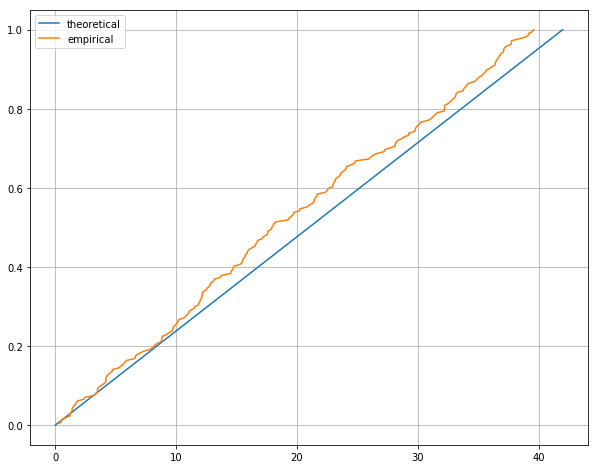

In [20]:
def dist_func_1(x):
    return sts.uniform.cdf(x, 0, 42)

def emp_dist_func(arr):
    res = []
    n = len(arr)
    for i in range(1,n+1):
        res.append(i/n)
    return res

X = np.linspace(0, 42, 2000)
Y = dist_func_1(X)
Y_ep = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [21]:
func = dist_func_1

def finding_sup(X_ep, emp_dist_func:callable, func:callable):
    res = 0
    x_ind = 0 
    n = len(X_ep)
    Y_ep = emp_dist_func(X_ep)
    for i in range(n):
        m = np.sqrt(n)*abs(Y_ep[i] - func(X_ep[i]))
        if m > res:
            res = m
            x_ind = X_ep[i]
    print(x_ind)
    return res

t = finding_sup(X_ep, emp_dist_func, func)
t

24.1265872473596


1.166832885446394

In [22]:
#Ex_4b
arr_6 = data[5]
arr_6 = np.array(arr_6)
arr_6[0:20]

array([0.09009196, 0.09507472, 0.254565  , 0.05962416, 0.06030947,
       0.09163989, 0.06321764, 0.6678044 , 0.03275208, 0.15501148,
       0.01148507, 1.07630602, 0.27164744, 0.10284019, 0.02355389,
       0.16379156, 0.34603526, 0.13370982, 0.02455389, 0.14015027])

In [23]:
x_mean = arr_6.mean()
n = len(arr_6)
X_ep = sorted(arr_6)

print(x_mean, n)

0.17908535594275005 214


<function matplotlib.pyplot.show(*args, **kw)>

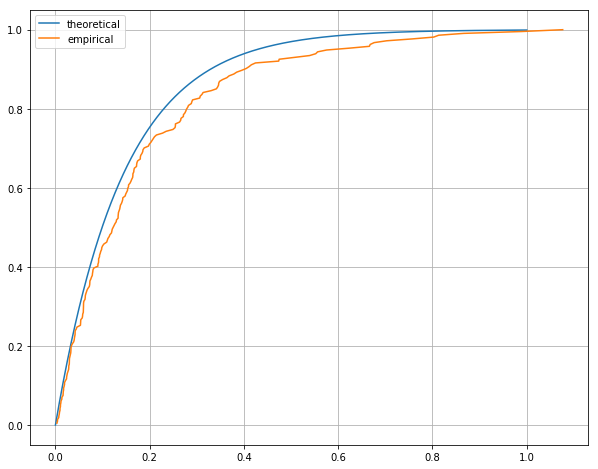

In [24]:
def dist_func_2(x):
    return sts.expon.cdf(x, scale = 1/7)

X = np.linspace(0, 1, 200000)
Y = dist_func_2(X)
Y_ep = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [25]:
func = dist_func_2
t = finding_sup(X_ep, emp_dist_func, func)
t

0.132918407202216


1.2032279870242069

In [26]:
#Ex_4c
arr_7 = data[6]
arr_7 = np.array(arr_7)
arr_7[0:20]

array([ 1.28035355,  1.5746408 , -1.72282202,  0.60430708, -1.09766372,
        0.47819583,  0.2358903 ,  0.58266367, -0.24838915, -0.87069682,
       -1.00793094, -2.13552015, -0.36343655, -0.03334123,  2.67027951,
        0.13712736,  1.20559759,  0.58220447, -3.63919671, -0.81046162])

In [27]:
x_mean = arr_7.mean()
n = len(arr_7)
X_ep = sorted(arr_7)

print(x_mean, n)

0.3537916515825641 214


<function matplotlib.pyplot.show(*args, **kw)>

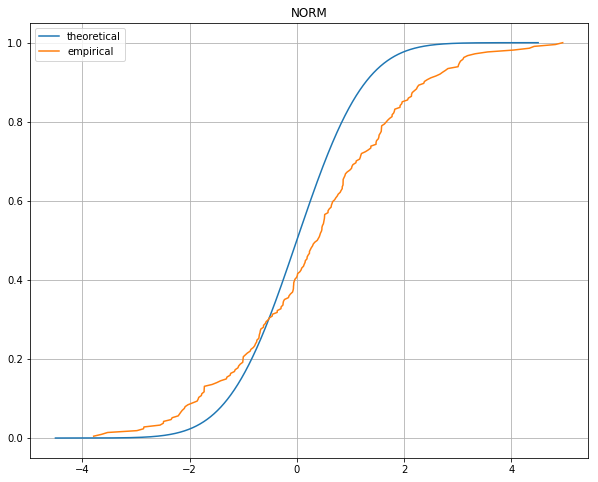

In [28]:
def dist_func_3(x):
    return sts.norm.cdf(x)

X = np.linspace(-4.5, 4.5, 200000)
Y = dist_func_3(X)
Y_ep = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.title('NORM')
plt.legend()
plt.grid()
plt.show

In [29]:
func = dist_func_3

t = finding_sup(X_ep, emp_dist_func, func)
t

1.47719681238929


2.73846921630449

In [46]:
#Ex_5
arr_8 = data[7]
arr_8 = np.array(arr_8)
arr_8[0:20]

array([0.17076797, 0.52882856, 0.36197753, 0.21586667, 0.        ,
       0.        , 0.        , 0.34009782, 0.        , 0.50949874,
       0.        , 0.        , 0.        , 0.16285358, 0.47515378,
       0.09228161, 0.        , 0.        , 0.07812175, 0.        ])

In [47]:
arr = sorted(list(arr_8))
arr[::-1].index(0.0)

127

In [48]:
#arr[86:]

In [49]:
x_mean = arr_8.mean()
n = len(arr_8)
X_ep = sorted(arr[86:])

print(x_mean, n)

0.18836117535209393 214


<function matplotlib.pyplot.show(*args, **kw)>

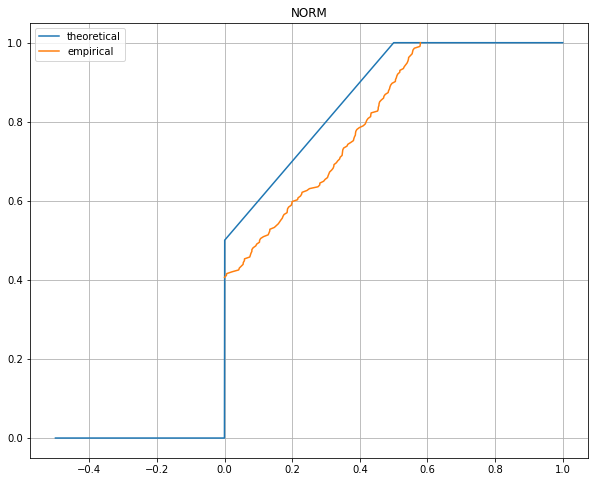

In [51]:
def dist_func_5(x):
    if (x < 0):
        return 0
    else:
        if x <= 0.5:
            return x+0.5
        else:
            return 1

def emp_dist_func_0(arr):
    res = []
    n = 214
    res.append(87/n)
    for i in range(88, n+1):
        res.append(i/n)
    return res

X = np.linspace(-.5, 1, 2000)
Y = []
for x in X:
    Y.append(dist_func_5(x))
Y_ep = emp_dist_func_0(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.title('NORM')
plt.legend()
plt.grid()
plt.show

In [52]:
func = dist_func_5

t = finding_sup(X_ep, emp_dist_func_0, func)
t

0.304503802047111


1.647562164569826

In [37]:
np.sqrt(214)*(Y_ep[0]-dist_func_5(0))

5.94719756511457

In [38]:
#Ex_6
arr_9 = data[8]
arr_9 = np.array(arr_9)
arr_9[0:20]

array([0.00314924, 0.23422278, 0.70937691, 0.55028814, 0.1607301 ,
       0.6069181 , 0.27051868, 0.40801302, 0.0071923 , 0.31327832,
       0.2949676 , 0.01794373, 0.61835034, 0.22181289, 0.64150695,
       0.04085287, 0.6812748 , 0.21516833, 0.18103907, 0.55361494])

In [39]:
x_mean = arr_9.mean()
n = len(arr_9)
X_ep = sorted(arr_9)

print(x_mean, n)

0.30966600220537294 214


<function matplotlib.pyplot.show(*args, **kw)>

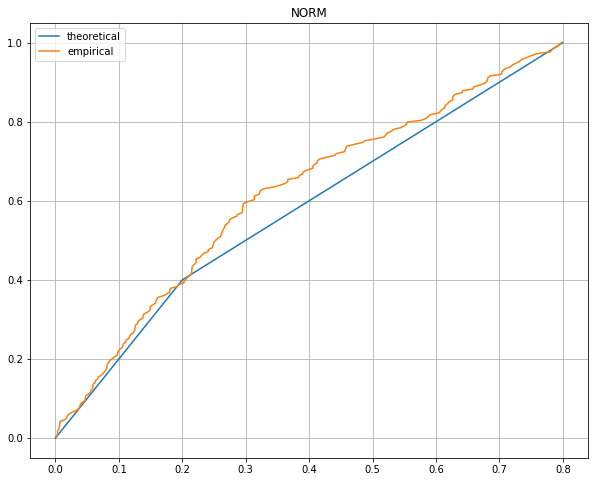

In [40]:
def dist_func_6(x):
    eps = 0.000001
    if (x < eps):
        return 0
    else:
        if x <= 0.8 and x > 0.2:
            return 1*x+0.2
        elif x <= 0.2:
            return 2*x

X = np.linspace(0, 1, 2000)
Y = []
for x in X:
    Y.append(dist_func_6(x))
Y_ep = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.title('NORM')
plt.legend()
plt.grid()
plt.show

In [41]:
func = dist_func_6

t = finding_sup(X_ep, emp_dist_func, func)
t

0.322976859286427


1.5095595291404427

In [43]:
p = 0.2
q = 0.8
m = p**2/2 + q**2/2
d = 0.2**3/12 + q**3/12

t_2 = np.sqrt(n/d)*(x_mean - m)
t_2

-2.131697072315232

0.8

In [53]:
#Ex_7
arr_10 = data[9]
arr_10 = np.array(arr_10)
arr_10

array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.47364387, 0.3880235 , 1.        , 0.        , 0.50843552,
       0.84479959, 0.        , 1.        , 0.74547701, 0.87349372,
       0.67320591, 0.59422666, 1.        , 0.        , 0.03349377,
       0.        , 0.        , 1.        , 1.        , 0.33175624,
       1.        , 1.        , 1.        , 0.177152  , 1.        ,
       1.        , 1.        , 0.9096042 , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.69842306, 0.        , 1.        ,
       0.2030104 , 0.34712201, 0.17534778, 0.28024386, 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.90704052,
       0.23004106, 0.        , 0.        , 1.        , 0.        ,
       0.84786366, 0.87359077, 0.31952656, 0.        , 0.        ,
       0.6551203 , 0.        , 0.        , 0.        , 1.     

In [54]:
arr = sorted(list(arr_10))
#arr[68:143]

In [55]:
x_mean = arr_10.mean()
n = len(arr_10)
X_ep = np.array(arr[68:143])

print(x_mean, n)

0.5045771181559469 214


<function matplotlib.pyplot.show(*args, **kw)>

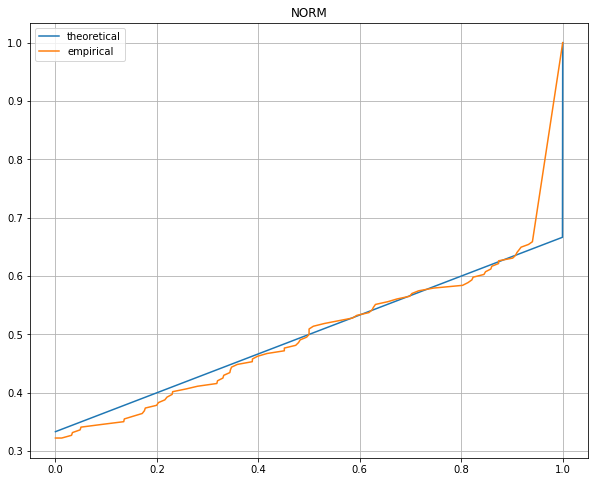

In [56]:
def dist_func_7(x):
    if (x < 0):
        return 0
    else:
        if x < 1:
            return 1/3*x+1/3
        elif x >= 1:
            return 1
        
def emp_dist_func_1(arr):
    res = []
    n = 214
    res.append((214-145)/n)
    for i in range(69, 142):
        res.append(i/n)
    res.append(1)
    return res

X = np.linspace(0, 1, 2000)
Y = []
for x in X:
    Y.append(dist_func_7(x))
Y_ep = emp_dist_func_1(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.title('NORM')
plt.legend()
plt.grid()
plt.show

In [57]:
func = dist_func_7

t = finding_sup(X_ep, emp_dist_func_1, func)
print('otvet:',t)

0.134662403259426
otvet 0.24035245887911563


In [239]:
#Ex_8
arr_11 = data[10]
arr_11 = np.array(arr_11)
arr_11[0:29]

array([0.94962495, 0.77950007, 0.74415484, 0.85921901, 0.82915684,
       0.80959993, 0.72032656, 0.77696866, 0.72667682, 0.93723891,
       0.76810866, 0.82348783, 0.83218349, 0.75540393, 0.74252203,
       0.91117391, 0.66486008, 0.72983741, 0.88401163, 0.76475719,
       0.8101008 , 0.95396331, 0.98560104, 0.99412732, 0.70964768,
       0.82646127, 0.74000012, 0.86208972, 0.79642019])

In [242]:
x_mean = arr_11.mean()
n = len(arr_11)
X_ep = sorted(np.array(arr_11))

print(x_mean, n)

0.8311650280070395 214


<function matplotlib.pyplot.show(*args, **kw)>

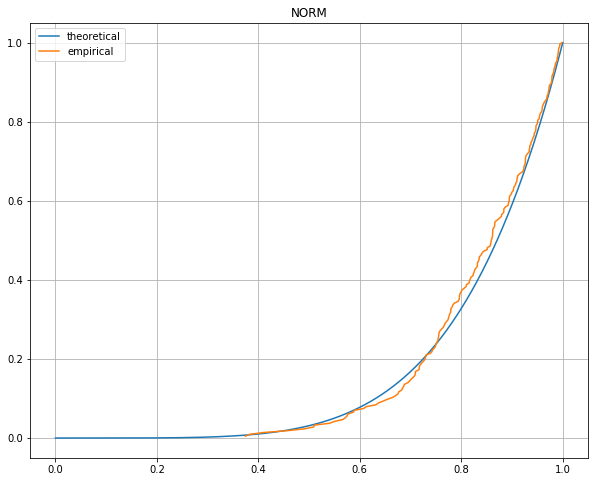

In [243]:
def dist_func_8(x):
    if (x < 0):
        return 0
    else:
        if x < 1:
            return x**5
        elif x >= 1:
            return 1        

X = np.linspace(0, 1, 2000)
Y = []
for x in X:
    Y.append(dist_func_8(x))
Y_ep = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.title('NORM')
plt.legend()
plt.grid()
plt.show

In [244]:
func = dist_func_8

t = finding_sup(X_ep, emp_dist_func, func)
t

0.866380566265434


0.8570973435506746

In [100]:
#Ex_9
arr_12 = data[11]
arr_12 = np.array(arr_12)
arr_12[0:29]

array([ 1.65157561, -1.0530453 ,  0.56345673,  0.55627257,  1.31950614,
        1.71913091, -0.02003553, -0.04074179, -1.1483296 , -0.14170007,
       -2.09585644, -1.01805549,  1.09641828,  0.25356734, -0.78651379,
       -1.09285305, -0.71622626, -1.54384131, -0.90356093,  1.10526671,
       -0.24024235, -0.68780959, -1.22633966, -1.72620243,  0.69188196,
       -0.10557589,  2.21140602, -2.85079336,  0.10951915])

In [101]:
x_mean = arr_12.mean()
n = len(arr_12)
X_ep = sorted(np.array(arr_12))

print(x_mean, n)

0.11649979485363375 214


<function matplotlib.pyplot.show(*args, **kw)>

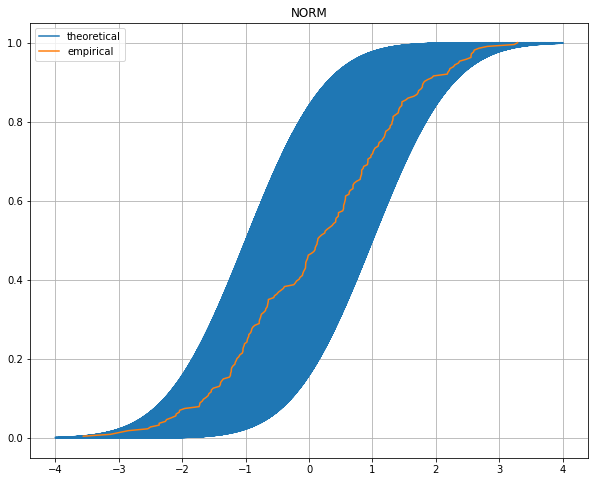

In [110]:
def dist_func_9(x):
    tmp = sts.bernoulli.rvs(0.5, size = 1)[0]
    if tmp == 1:
        return sts.norm.cdf(x, -1,1)
    else:
        return sts.norm.cdf(x, 1,1)

X = np.linspace(-4, 4, 20000)
Y = []
for x in X:
    Y.append(dist_func_9(x))
Y_ep = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.title('NORM')
plt.legend()
plt.grid()
plt.show

In [105]:
func = dist_func_9

t = finding_sup(X_ep, emp_dist_func, func)
t

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'